In [14]:
%matplotlib notebook

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def sigm(x):
    return 1. / (1. + np.exp(-1. * x))


def log_regr(X, y, batch_size, learning_rate, max_iters):
    X = np.hstack([np.ones((X.shape[0], 1)), np.array(X)])
    y = np.array(y)
    batch_size = int(batch_size * X.shape[0])

    weights = np.random.randn(X.shape[1]) * learning_rate

    for it in range(max_iters):
        idx = np.random.choice(X.shape[0], size=batch_size, replace=False)
        for val, y_true in zip(X[idx], y[idx]):
            weights += learning_rate * (y_true - sigm(np.dot(weights, val))) * val / len(idx)
    return weights


def predict(X, threshold, weights):
    def _predict_(X, weights):
        X = np.hstack([np.ones((X.shape[0], 1)), np.array(X)])
        return sigm(np.dot(X, weights.T))

    return np.array(_predict_(X, weights) >= threshold).astype(int)


def get_fpr_tpr(true_labels, pred_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    TP, TN, FP, FN = cm[0][0], cm[1][1], cm[1][0], cm[0][1]
    return 1. * FP / (FP + TN), 1. * TP / (TP + FN)


def plot(X_train, y_train, X_test, y_test):
    weighs = log_regr(X_train, y_train, learning_rate=0.0005, batch_size=0.05, max_iters=10000)
    score = list()
    for t in np.arange(0, 1.01, 0.025):
        preds = predict(X_test, threshold=t, weights=weighs)

        fpr, tpr = get_fpr_tpr(y_test, preds)
        score.append((fpr, tpr))

    score = sorted(score, key=lambda x: x[0])
    fpr = [s[0] for s in score]
    tpr = [s[1] for s in score]

#     fig, ax = plt.subplots(figsize=(8, 8))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
#     plt.title('ROC')
#     plt.legend(loc="lower right")
    auc_score = auc(fpr, tpr)
    plt.title('auc score: {}'.format(auc_score), size=14)
    plt.show()

<IPython.core.display.Javascript object>


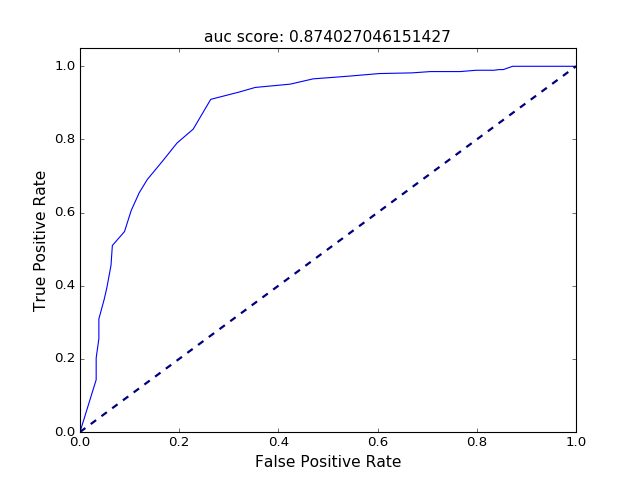

In [23]:
old = pd.read_csv('./spambase_old.csv')
new = pd.read_csv('./spambase_new.csv')
X_train = old.drop(['label'], axis=1).as_matrix()
y_train = old['label'].as_matrix()

X_test = new.drop(['label'], axis=1).as_matrix()
y_test = new['label'].as_matrix()

plot(X_train, y_train, X_test, y_test)


<IPython.core.display.Javascript object>


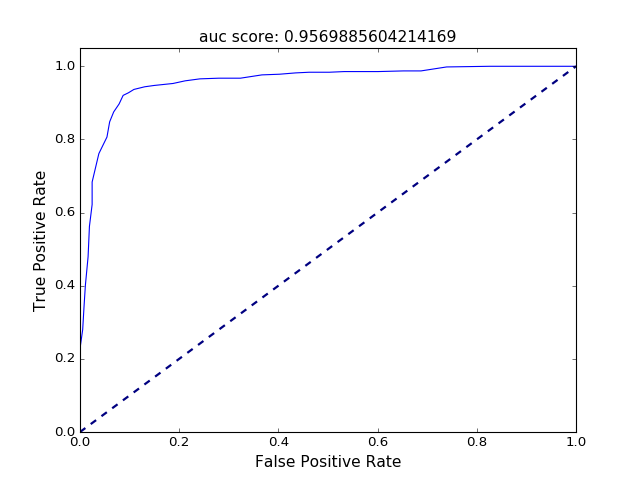

In [24]:
old = pd.read_csv('./spambase_old.csv')
new = pd.read_csv('./spambase_new.csv')
X_train = old.drop(['label'], axis=1).as_matrix()
y_train = old['label'].as_matrix()

X_test = new.drop(['label'], axis=1).as_matrix()
y_test = new['label'].as_matrix()

transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

plot(X_train, y_train, X_test, y_test)
